# Cluster Analysis

## Introduction

The objective of cluster analysis (CA) is to uncover structure in a dataset by aggregating similar rows into groups called clusters. 
- Therefore, CA contrasts with PCA (principal components analysis) and FA (factor analysis) in finding simplification among the rows instead of among the columns of the dataset. CA, PCA and FA all attempt to simplify a dataset and all do so without supervision. 

However, PCA and FA actually reduce the number of columns, whereas CA does not reduce the number of rows. Moreover, PCA and FA change the values of the variables, whereas CA does not. 

But for some purposes, each cluster may be treated as if each were a single entity (as in a marketing campaign, for example) and thus CA effectively reduces the number of entities to understand. Grouping in CA is based on various measures of similarity or dissimilarity among the rows.

The two major problems of CA are ***to determine the number of clusters and to assign the rows to clusters.***

Some examples of applications of CA: 
 - Marketing: Market segmentation 
 - Politics: Analysis of voter blocs 
 - Psychology, psychiatry: Definition of personality types, mental diseases 
 - Biology: Reconstructing the evolutionary “tree of life” 
 - Linguistics: Reconstructing ancestral languages 
 - Anthropology: Mapping patterns of human migration and settlement 
 -  Environment: Identifying weather patterns and their propensity for air pollution

You should understand clearly that there is no supervision in CA. 
- What does that mean? It means that ***there is no training set of rows that have been correctly assigned to clusters, from which one can infer a rule for assigning unclassified rows to clusters***. You do not know how many clusters there are, nor do you know any members of any cluster. Yet you must still figure out how many clusters there are and assign each row to a cluster. 

There are parallel supervised statistical techniques that do infer rules to assign rows to clusters. 
- If you know how many groups there are and you have a training set of rows that have been correctly assigned to groups, you have supervision and you can infer rules for future assignment of rows to groups. Supervised assignment of rows to groups is called classification. Two examples of classification methodologies are discriminant analysis and logistic regression.

Because of the lack of supervision, CA is a more difficult challenge than classification. 
- There is not a great deal of theoretical foundation for the clustering procedures that have been proposed. ***Many clustering algorithms are ad hoc procedures*** that have been proposed because they merely seem intuitively plausible. There has been a fair amount of simulation and empirical work to try to learn how competing clustering methodologies are likely to work. These clustering methodologies have originated in many different disciplines, as the list of examples on page 1 of these notes suggests. 
- CA became a hot topic after the publication of Principles of Numerical Taxonomy (1963) by biologists Robert Sokal and Peter Sneath. They introduced numerical algorithms for grouping species by common descent rather than by subjective judgment of anatomical similarities.

There are five basic steps in all CA studies: 
- Select the observations to be clustered. 
- Define the variables to use in clustering the observations. 
- Compute similarities (or dissimilarities) among the observations. 
- Create groups (clusters) of similar observations. 
- Validate the resulting clusters.

Cautions about CA: 
- Most clustering techniques are simple procedures without much underlying statistical theory. 
- Clustering techniques evolved from many disciplines and bear the biases of those disciplines. 
- Different clustering techniques yield different solutions for the same data set. 
- The strategy of CA is structure-seeking, but its operation is structure-imposing.


## Terminology and Notation

### Definition

***Clusters*** are continuous regions of variable space containing a relatively high density of data points separated from other high density regions by areas containing a relatively low density of data points. 

The things being classified are variously called ***cases, observations, objects, entities, patterns***. The aspects of the entities used to assess their similarities/dissimilarities are variously called ***variables, attributes, characters, features***. 

For example, 19 companies are plotted by their profitability and growth rate. It is easy to see at least two clusters of companies. In the upper right are companies of high profitability and growth rate. In the lower left is a denser set of companies of low profitability and growth rate.



In [2]:
proc import datafile = 'data/Stock data.xlsx' out=stocks dbms=xlsx replace;
run;


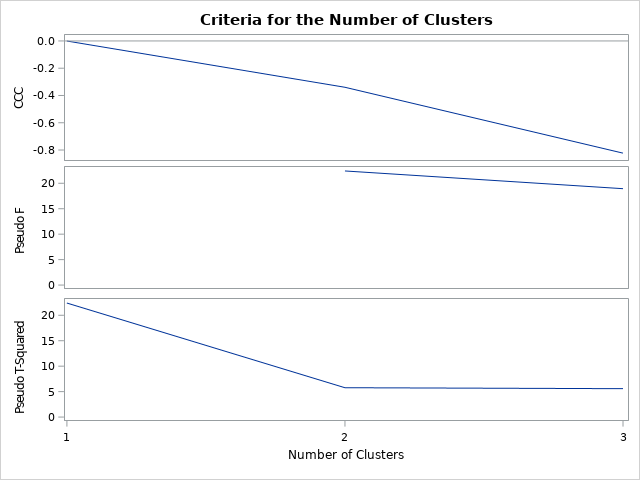
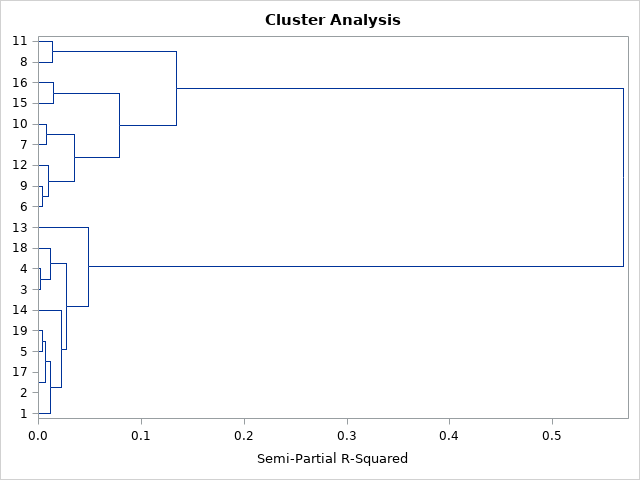

In [3]:
proc cluster data=stocks standard method=ward outtree=stocktree ccc pseudo;
    var P_E profit growth;
    copy industry firm;
    title "19 Stocks Clustered by WARD's Method on 3 Variables"; 
run;

In [4]:
proc tree data=stocktree out=stockout nclusters=3
    horizontal lineprinter pages=1 maxh=10;
    copy p_e growth;

![ward_stock](image/ward_stock.png)

In [8]:
proc plot data=stockout;
    plot p_e * growth = cluster /vpos=25 hpos=50;
run;

There are some characteristics of clusters that can be quantified when cases are plotted as points in p-dimensional variable space: 
1. Density -- the concentration of points is high within a cluster
2. Variance -- the dispersion from the center of a cluster is small for the points in the cluster 
3. Dimension -- the size or radius of the cluster is small 
4. Shape -- clusters are typically ellipsoidal 
5. Separation -- the degree to which clusters overlap or are disconnected. These characteristics can be used to help define algorithms to group objects into clusters.

We can think of the entities as the rows in a data matrix, with the attributes as the columns. Thus the data matrix corresponds to the standard SAS data set, or Excel spreadsheet, with observations as rows and variables as columns. Let n denote the number of rows (entities) and p denote the number of columns (variables). The ***data matrix is n x p***. 

From the data matrix, a similarity (or dissimilarity) matrix will be computed. The entry in row i and column j of the similarity matrix shows how similar (dissimilar) entity i and entity j are. Thus, ***the similarity matrix must be n x n***. Often, correlation is used to measure similarity. If correlation is used, the resulting similarity matrix is very different from the ordinary correlation matrix for the same n x p data matrix. ***The ordinary correlation matrix is p x p***. The entry in row i and column j of the ordinary correlation matrix shows how similar variable i and variable j are. 
- An example is the correlation between the rent and the area of a set of apartments. The set of all rents would be correlated with the set of all areas. By contrast, the entry in row i and column j of a similarity matrix shows how similar entity i and entity j are. An example would be the correlation between apartment 1 and apartment 2. The rent, area, age, number of rooms, etc. of apartment 1 would be related to the same variables for apartment 2. ***An n x n similarity matrix shows how similar the rows of the n x p data matrix are, whereas the ordinary p x p correlation matrix shows how similar the columns of the n x p data matrix are***. The similarity matrix is also called a proximity matrix. If desired, a dissimilarity matrix often can be created from a similarity matrix by simple means, such as subtracting correlations from ±1.

## Similarities and Dissimilarities

Two concepts underlie most techniques for calculating (dis)similarities among cases that are to be clustered: (A) correlation and (B) distance.

### (A) CORRELATION COEFFICIENTS for similarities.

This is a strange kind of correlation coefficient. It is a correlation between observations instead of between variables. It uses the same formula as the ordinary correlation coefficient, but the formula is ***applied to two rows of the n x p data matrix instead of two columns***. This results in mixing together numbers measured in possibly very different units to find means, standard deviations, and covariances.

Besides the issue of potentially meaningless units resulting from composites across unrelated variables, correlations as similarities have the difficulty that ***small variations in large numbers (such as salary) may overwhelm proportionately much larger variations in smaller numbers (such as number of people) in the similarity measure***; therefore, the clustering may be driven by, and cater to, variables with large values, such as salary.


An obvious possible remedy is to standardize all variables before clustering, but this suggestion is controversial because it implies that all variables are ***equally important in assessing similarity. ***

Another potential problem results from ***the selection of highly correlated variables as the basis for clustering. ***
- For example, if X1, X2, X3 are three highly correlated variables used with an unrelated X4 to compute a similarity measure, the effect is almost the same as using just X1 and X4, but giving X1 three times the weight of X4. So selecting the variables to use for CA could bias results. Principal Components Analysis and Factor Analysis can be used prior to CA to reduce the number of variables and produce uncorrelated "variables", but there is controversy over this, as well, because PCA and FA may tend to blur together two distinct clusters that are actually widely separated. 2 The problems discussed in this paragraph are also faced by distance (dissimilarity) measures discussed in (B), below.

Profile is a useful concept for comparing entities. A profile of a case is simply a vector of attribute values for a case -- in other words, the profile of a case is its row in the n x p data matrix for that case. A profile is usually displayed as a graph with the variable names listed on the horizontal axis and the scores (values) of the variables shown vertically as bars and/or connected dots. CA can be thought of as a way to group cases with similar profiles. The similarity between profiles can be decomposed into three parts: 
1. Shape -- the pattern of dips and rises of the profile as you look across the variables 
2. Scatter -- the dispersion of the scores around their average 
3. Elevation -- the mean score of the case over all of the variables.

The ***correlation coefficient*** can be enlisted to measure the similarity between two profiles. But it is ***sensitive only to shape. It is unaffected by differences between two profiles in terms of scatter and/or elevation.*** Two profiles with the same shape but different scatter and/or elevation will have correlation coefficient = 1.00. If you add the same number to every component of a profile, and/or if you multiply every component of a profile by the same positive number, the correlation with any other profile remains unaffected. Correlation measures for similarities are seldom used in practice.

### (B) DISTANCE MEASURES for dissimilarities.

dissimilarities. Common measures of distance between cases are:
1. Euclidean distance ($L^2$ distance) = $\sqrt{\sum_{k=1}^p (x_{ik}-x_{jk})^2}$
2. "Manhattan" (city-block – $L^1$ ) distance = $\sum_{k=1}^p |x_{ik}-x_{jk}|$
3. Mahalanobis distance = $(x_i - x_j)' \Sigma^{-1} (x_i - x_j)$
 - where ik x is the score of case i on variable k, jk x is the score of case j on variable k, $(x_i - x_j)'$ is the 1 x p row vector of differences between row i and row j of the data matrix, and $\Sigma^{-1}$ is the inverse of the p x p covariance matrix of the variables (not the cases).
   - Note that $(x_i - x_j)' \Sigma^{-1} (x_i - x_j)$ is conformable. It is (1 x p) x (p x p) x (p x 1) = 1 x 1. 

Generally, when Euclidean distance is used as a (dis)similarity measure, the ***square root is not taken because of the relative ease of analyzing sums of squares and the difficulty of analyzing square roots***.*** Mahalanobis distance is a generalization of Euclidean distance*** that adjusts for different variances and correlation between the variables. Euclidean distance and Mahalanobis distance are identical if the variables are uncorrelated and have the same variances. 
- In that case, S = I. If Euclidean distance may be thought of as distance between nested spheres, Mahalanobis distance may be thought of as distance between nested ellipsoids.


In addition to the problems in common to correlation and distance measures mentioned in (A) above, ***distance measures are strongly affected by the scatter (scale) of variables used in profiles. Therefore, it is standard to standardize variables prior to calculating distance measures used as (dis)similarities.***


SAS uses dissimilarity measures in its CA procedures, and by default they are squared Euclidean distances calculated from the input DATA=$<SAS DATASET>$. Similarity measures must be converted into dissimilarities in order for the SAS procedures to work properly. By default SAS does not standardize the variables; that can be done with the ***STANDARD*** option in ***PROC CLUSTER***, or by running ***PROC STDIZE*** prior to ***PROC FASTCLUS*** (which lacks the STANDARD option).

You can construct your own matrix of distances for inputting into ***PROC CLUSTER*** (but not ***PROC FASTCLUS***) by creating a ***TYPE=DISTANCE*** dataset (see “Example 30.1 Cluster Analysis of Flying Mileages between 10 American Cities” in the Examples section of the SAS help file for ***PROC CLUSTER*** for an example).

### SpinOff - “Example 30.1 Cluster Analysis of Flying Mileages between 10 American Cities”
(source : http://support.sas.com/documentation/cdl/en/statug/63962/HTML/default/viewer.htm#statug_cluster_sect025.htm)

This example clusters 10 American cities based on the flying mileages between them. Six clustering methods are shown with corresponding dendrograms. 
- The EML method cannot be used because it requires coordinate data. The other omitted methods produce the same clusters, although not the same distances between clusters, as one of the illustrated methods: 
- complete linkage and the flexible-beta method yield the same clusters as Ward’s method, 
- McQuitty’s similarity analysis produces the same clusters as average linkage, - and the median method corresponds to the centroid method.

All of the methods suggest a division of the cities into two clusters along the east-west dimension. 
- There is disagreement, however, about which cluster Denver should belong to. Some of the methods indicate a possible third cluster that contains Denver and Houston.

The following step displays the city mileage SAS data set, which is available in the Sashelp library and is designated as a TYPE=DISTANCE data set when it is used by PROC CLUSTER

In [15]:
proc print noobs data=sashelp.mileages;
run;

Atlanta,Chicago,Denver,Houston,LosAngeles,Miami,NewYork,SanFrancisco,Seattle,WashingtonDC,City
0,.,.,.,.,.,.,.,.,.,Atlanta
587,0,.,.,.,.,.,.,.,.,Chicago
1212,920,0,.,.,.,.,.,.,.,Denver
701,940,879,0,.,.,.,.,.,.,Houston
1936,1745,831,1374,0,.,.,.,.,.,Los Angeles
604,1188,1726,968,2339,0,.,.,.,.,Miami
748,713,1631,1420,2451,1092,0,.,.,.,New York
2139,1858,949,1645,347,2594,2571,0,.,.,San Francisco
2182,1737,1021,1891,959,2734,2408,678,0,.,Seattle
543,597,1494,1220,2300,923,205,2442,2329,0,Washington D.C.



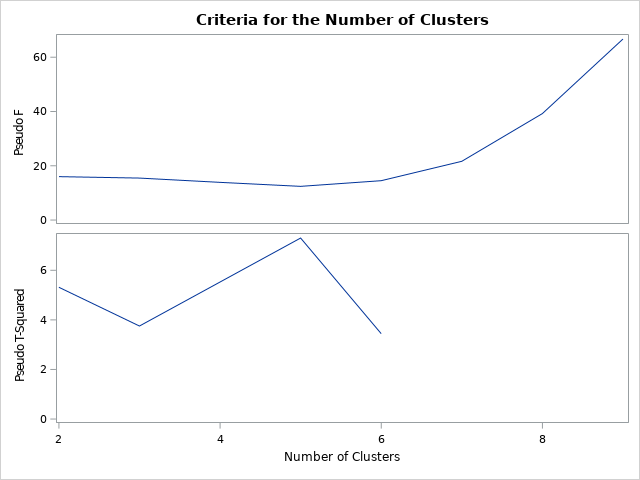
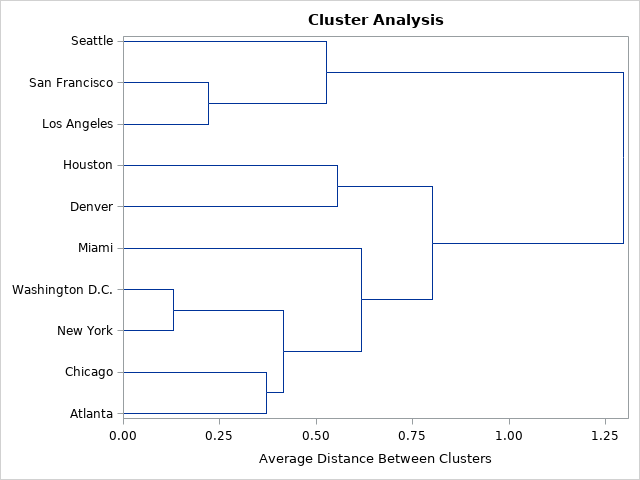

In [16]:
title 'Cluster Analysis of Flying Mileages Between 10 American Cities';
ods graphics on;

title2 'Using METHOD=AVERAGE';
proc cluster data=sashelp.mileages(type=distance) method=average pseudo;
    id city;
run;


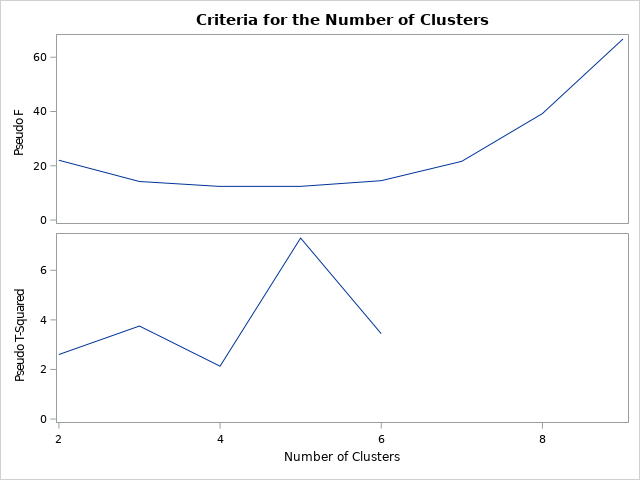
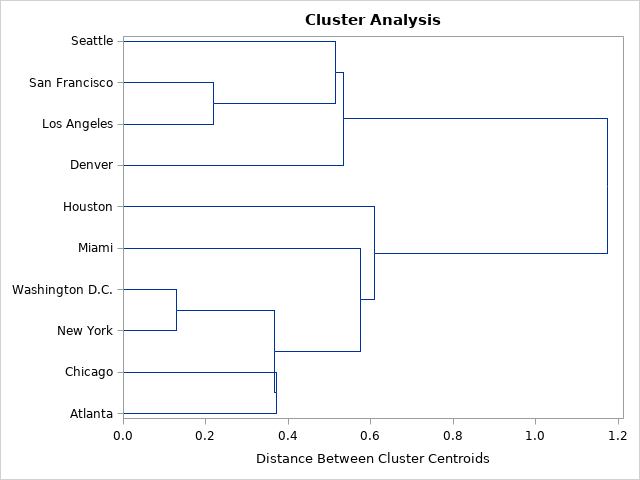

In [17]:
title2 'Using Method = Centroid';
proc cluster data=sashelp.mileages(type=distance) method=centroid pseudo;
    id city;
run;


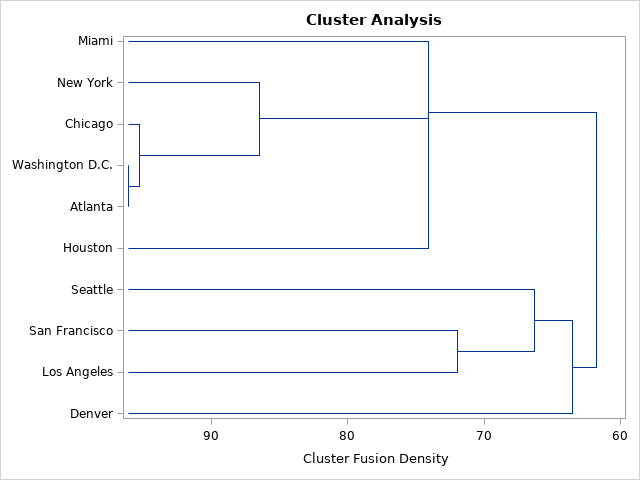

In [18]:
title2 'Using METHOD=DENSITY K=3';
proc cluster data=sashelp.mileages(type=distance) method=density k=3;
   id City;
run;


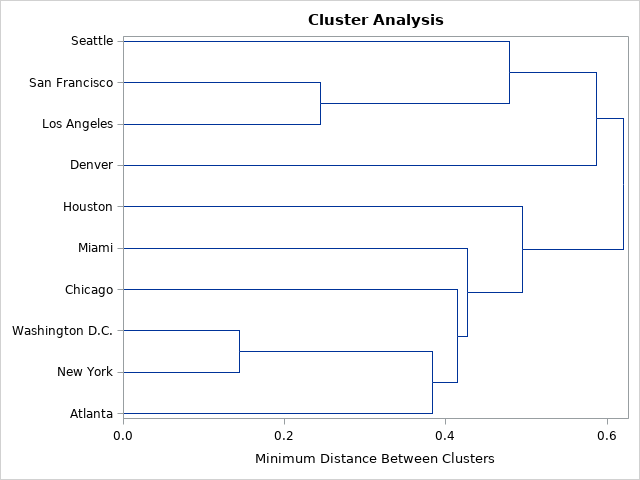

In [19]:
title2 'Using METHOD=SINGLE';
proc cluster data=sashelp.mileages(type=distance) method=single;
   id City;
run;


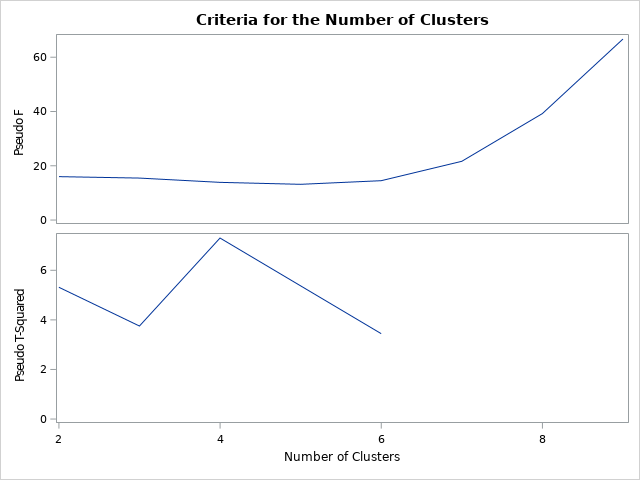
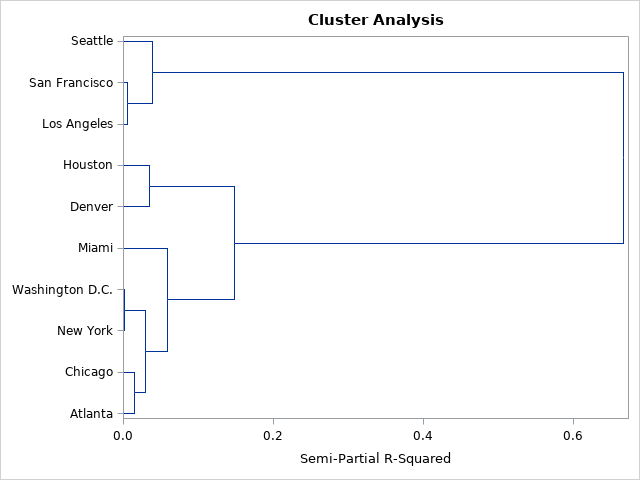

In [20]:
title2 'Using METHOD=WARD';
proc cluster data=sashelp.mileages(type=distance) method=ward pseudo;
   id City;
run;

## Clustering Methods

### HIERARCHICAL AGGLOMERATIVE

These are the most-used clustering methods. They all begin with each case in its own cluster and proceed to join cases together to form larger clusters, eventually ending with all cases in one super-cluster. So there are n steps. At the end, the intermediate history of the joining (agglomeration) can be displayed as a ***TREE***, with the cases listed on the horizontal axis at the bottom (or left side), with a vertical line leading up from each case until it joins with the line of another case or cluster, the height of the tree indicating the degree of (dis)similarity when the join occurs. So the "tree" is upside-down (or sideways) with leaves at the bottom (or left side) and root at the top (or right side). In fact, the arboreal vocabulary is retained and mixed with genealogical vocabulary: A ***LEAF*** is a case; a ***ROOT*** is the super-cluster at the top (right side) consisting of all the leaves; a ***BRANCH*** is a cluster containing more than one, but not all, cases; a ***NODE*** is a leaf, a branch, or a root; if cluster A is formed by joining clusters B and C, then A is the ***PARENT*** of B and C, which are, of course, the ***CHILDREN*** of A. So a leaf is a node with no children; a root is a node with no parent. If every cluster has at most two children, the tree is ***BINARY***. 

The degree of relatedness of two cases is indicated by their most recent common "ancestor" (cluster in which both are members) in the resulting hierarchy. Each of the n steps in the agglomeration represents a possible solution to the two major clustering problems (how many clusters and how to assign membership). Presumably, the solution that puts all cases in separate clusters (at the bottom [left] of the tree) and the solution with all cases in one supercluster (at the top [right] of the tree) are not acceptable. Solutions that are in-between the top and the bottom can be examined and tested for their reasonableness.

The tree in Figure 3 is read from left to right. At the first step, Chevron and NCR are found to be the two most similar companies and are joined together in a cluster. At the second step, Texaco and Mobil are the most similar and are joined. Eventually, clusters start to join in larger clusters. For example, in step 5 the Chevron/NCR cluster that was formed in step 1 joins the Amoco/IBM cluster that was formed in step 4. The joins continue until in step 18, two large clusters of 10 and 9 companies join to form the root cluster of all 19 companies. The tree can be cut by a vertical line at any point between the root and the leaves to yield a solution. The branches that remain intact at the cut point become the clusters for the solution. For example, if the tree is cut vertically just to the left of the last joining, then there will be two large intact branches of 9 and 10 companies, respectively.

![dendro_19](image/dendro_19stock.png)

In SAS, ***PROC CLUSTER*** implements hierarchical agglomerative clustering (with 11 different methoids). ***PROC CLUSTER*** produces binary trees only. ***PROC TREE*** displays the tree and permits outputting a dataset containing the cases' cluster memberships from any specified cut point on the tree.

The following are some common hierarchical agglomerative methods implemented in SAS:

(1) ***Single Linkage (“Nearest Neighbor”)***. This hierarchical agglomerative method begins with each case in its own cluster and joins the two most similar cases into a new cluster, replacing the two former cases. After the join, the similarity between the new cluster and remaining ones must be redefined and calculated. 
  - In single linkage, the similarity between the new cluster and a remaining entity is defined to be the similarity between the nearest members of the entity and the cluster – i.e., the greatest pairwise similarity (least dissimilarity) between the entity and any member of the new cluster.
  - This means that the algorithm can continue to use the initial similarity matrix – no need to recompute its values – one just needs to keep track of which rows have been clustered. 
At the next step, the two most similar entities from the new set of clusters are joined, and the similarities between remaining entities and the new entity are recalculated. The process continues until all entities have been joined in the super-cluster at the root. This method tends to do the worst in simulation studies. It tends to form elongated clusters of unequal numbers of cases (e.g., two clusters of 89 cases and one cluster of one case).

(2) ***Complete Linkage (“Farthest Neighbor”)***. Like single linkage, except that similarity is the distance between the farthest members of two entities. So a joining entity must be close to ALL members of the entity to be joined. 
- In complete linkage, the similarity between the new cluster and a remaining entity is defined to be the least pairwise similarity (greatest dissimilarity) between the entity and any member of the new cluster. Again, like single linkage, this means that the algorithm can continue to use the initial similarity matrix – no need to recompute its values – one just needs to keep track of which rows have been clustered. ***The complete linkage method tends to find compact hyper-spherical clusters of highly similar cases. ***

(3) ***Average Linkage (“Average Neighbor”).*** Like complete linkage, except that the AVERAGE level of similarity between any candidate entity for inclusion into an existing cluster and the individual members of that existing cluster must be within a specified level. In average linkage, the similarity between the new cluster and a remaining entity is defined to be the mean pairwise similarity (mean dissimilarity) between the entity and the members of the new cluster. Unlike single linkage and complete linkage, the similarity matrix must be recomputed after each step. This method was proposed as an antidote to the extremes of single and complete linkage. It tends to find clusters of roughly equal variance. ***Average linkage and Ward's method tend to do best in simulation studies. ***

(4) ***Ward's Method***. Like single linkage, except that at each step, clusters are joined that result in the least increase in the within-cluster variance.5 To gain an intuitive understanding of what Ward’s method tries to do, look at Figure 1, which shows two clusters. Ward’s method tries to choose the clusters to make the points within each cluster as close to each other as possible and as far from the other cluster as possible. In Figure 1, the points within the lower left cluster are closer to each other, on average, than they are to the points in the upper right cluster, and vice-versa. The lower left cluster is clearly separated from the upper right cluster. One can measure how close the points in each cluster are to each other by their variance: The smaller the variance within a cluster, the closer its points are to each other. In the most extreme case, the variance within a cluster could be zero if the points were all equal to the mean within the cluster. The bigger the variance within a cluster, the farther apart its points are. In Figure 1, the points within the lower left cluster clearly have less within-cluster variance than the points in the upper right cluster.


(5) ***Centroid Method***. The centroid of a cluster is the vector of means of the p variables of the cases in the cluster. The centroid method is like single linkage, except that the (dis)similarity between two clusters is defined to be the squared Euclidean distance between the two centroids of the two clusters. When two clusters are joined, the centroid of the new cluster becomes the reference point for recalculating (dis)similarities. 

(6) ***Density Linkage***. Like single linkage, except that the (dis)similarity between two clusters is based on nonparametric density estimation, which estimates the density of points in the vicinity of the clusters. No assumptions are made about the shape of clusters. This method is relatively unbiased and makes few assumptions of the data, but does not work quite as well as other methods in situations where the biases of other methods are met.

### NON-HIERARCHICAL METHODS: ITERATIVE PARTITIONING.

Most of these methods begin by dividing the cases into a number of preliminary clusters. 
- The number of preliminary clusters is user-specified. The centroids of the preliminary clusters are computed and become the "seeds" for growing subsequent clusters iteratively. Each case is then assigned to the nearest seed. The cases assigned to the same seed constitute a new cluster, and the set of all such new clusters thus determine a new partitioning of the cases into a second set of clusters. 
-The centroids of the second set of clusters are then calculated, and cases are (re)assigned to the nearest of the second set of centroids. This process continues until no case changes cluster membership. 
- The most famous and most commonly used of these methods is k-means clustering.

In SAS, ***PROC FASTCLUS*** implements iterative partitioning. One methods is k-means clustering. PROC FASTCLUS can handle much larger datasets than PROC CLUSTER. Therefore, PROC FASTCLUS is often used to reduce the dataset to a smaller number of clusters(<100) before running them through PROC CLUSTER for final clustering.  By default, PROC FASTCLUS does only one pass through the data.

There are three major decisions to make in iterative partitioning: 
1. Initial partition. This can be determined by pre-specifying a set of seeds, or by determining the preliminary partition. Both of these can be done randomly or by a method. SAS offers both options. 
2. Type of pass. This is the way to reassign cases during each pass. A common method is “K-means” (reassignment to nearest centroid), implemented in SAS, which offers various options on the technical details of carrying it out. Another method is “hillclimbing”, which reassigns cases on the basis of some statistical criterion other than distance. 
3. Statistical criterion (mentioned in the preceding point). Distance is the simplest, but other methods use properties of covariance matrices. 

Simulation studies show that the major cause of inferior performance in iterative partitioning is a poor initial partition.

***K-means clustering***. The objective of K-means clustering is to partition the data rows into a given number (K) of clusters in such a way that the within-cluster sum-of-squares (WSS – see earlier discussion of Ward’s method) is minimized. In its objective,*** K-means clustering resembles Ward’s method. Both methods seek to minimize the WSS.***

However, Ward’s method operates hierarchically and agglomeratively, whereas K-means operates iteratively. 
- ***Ward’s method produces a solution for each possible number of clusters, whereas K-means produces a solution for only one given number of clusters***. K-means begins with an initial set of K cluster “seeds” spread more or less uniformly across the data points. These seeds can be user specified, picked at random, or selected by some algorithm. They are often data points, but need not be. Then each data point is assigned to the closest seed. This results in K preliminary clusters. Then the centroid (mean) of each cluster is calculated. The K centroids become the new seeds. Another pass is made through the data points. Each data point is (re)assigned to the closest centroid/new seed/mean. A revised set of K clusters results.7 Centroids are calculated yet again, and the process is iterated until no data points change cluster membership – or until the limit on number of passes is reached.


### FACTOR ANALYSIS VARIANTS


The application of factor analysis (FA) ideas to the clustering of cases is based on the intuitive observation that factor analysis, in a sense, groups similar variables together, whereas cluster analysis groups similar cases together. Since FA, in this sense, operates on the columns of the data matrix, just rotate the data matrix 90 degrees and apply FA to the rows of the data matrix. Ordinarily, FA is performed on the p x p matrix of correlations between variables; this is called ***R-mode FA.*** But here, FA is proposed for the n x n correlation matrix of cases, rather than the more familiar p x p correlation matrix of variables. When FA is performed on the n x n matrix of correlations between cases, it is called ***Q-mode FA***. In Q-mode FA, cases are assigned to clusters based on the factor loadings of the cases. Note that FA-based cluster analysis implies that cases are standardized to mean 0 and stdev 1 because Q-mode FA analyzes the case correlation matrix. Thus the Q-mode approach to cluster analysis ignores elevation and scatter in the profiles of cases and groups cases only by their shapes.

In SAS, ***PROC FACTOR*** can be used to cluster cases if the usual nxp SAS data set is transposed, say by ***PROC TRANSPOSE***. (Another SAS Procedure, ***PROC VARCLUS***, uses FA to cluster variables; it is primarily a dimensionality reduction technique)

### HIERARCHICAL DIVISIVE

 These methods are the logical opposites of hierarchical agglomerative methods. They begin with all cases in one cluster and divide it into successively smaller groups. SAS does not implement these methods.

### CLUMPING METHODS

These methods permit overlapping clusters, with cases sharing membership in more than one cluster. They calculate a similarity matrix between cases and iteratively reallocate cases until a "cohesion function" is stabilized. The methods originated in linguistics in order to group words, which may have more than one meaning. SAS does not implement these methods.

### GRAPH THEORETIC METHODS

These methods draw on the well-developed mathematical theory of graphs (a tree is a graph, e.g.). This link with mathematics may in time provide testable hypotheses and insights on cluster formation. SAS does not implement these methods.


## Determining the Number of Clusters

This is an unsolved problem in statistics. None of the proposed solutions is widely accepted. The reasons for this: 
1. A suitable formulation of a null hypothesis to capture the meaning of “there are no clusters” is elusive. 
2. A suitable formulation of alternative hypotheses is elusive. 
3. Those hypotheses that can be tested are uninformative. 
4. Those hypotheses that are most meaningful have test statistics with intractable distributions
5. F tests based on ANOVA (such as those found in ***PROC DISCRIM*** or ***PROC GLM***) to determine the explanatory power of the clusters produced by CA are invalid for testing differences between clusters. The reason is that CA is structure-imposing: CA will find clusters even if none exist. Consequently, such F tests are almost always misleadingly significant

Some advice and observations on determining the number of clusters: 

1. Always pay attention to the underlying theory of your subject. If theory suggests a certain number of clusters or if there is some “natural” number of clusters, then be sure to include that number among the possibilities that you check out. 
2. The three top performing heuristic methods in 1985 & 1988 studies by Milligan and Cooper are implemented in SAS:
 - The SAS-developed*** cubic clustering criterion (CCC)***. Look for local peaks in CCC when plotted against the number of clusters. 
 - The ***pseudo-F statistic***, which measures the separation among all clusters. Look for local peaks in pseudo-F when plotted against the number of clusters.
 - The ***pseudo-T2 statistic***, which measures the separation between the two clusters most recently joined. Plot pseudo-T2 against the number of clusters and choose the number to be one more than the peak (or end of a run of large values) of pseudo-T2. PROC CLUSTER can output variables _NCL_, _CCC_, _PSF_, and _PST_ for certain clustering methods. These variables are the number of clusters in a step, cubic clustering criterion, pseudo-F, and pseudo-T2 statistics, respectively. 
3. In a similar vein as (2), use ***PROC CLUSTER*** with ***METHOD=DENSITY*** and vary the K parameter (number of nearest neighbors). With this method, the variable _MODE_ (number of modes, i.e., clusters) can be output and plotted against K. If _MODE_ is constant on a range of K's, then there are at least that many clusters. 
4. (Generalization of (3)) Try a number of different solutions and make a qualitative assessment of which number of clusters is most satisfactory.
5. Plot the data, or their canonical discriminant functions (***PROC CANDISC***), on two dimensions with plotting character equal to cluster number. Look at the clusters and see if they make sense.

## Validating the Cluster Analysis

Like the determination of the number of clusters, validating the grouping of cases into clusters is an unsolved problem. Two methods in common use are rejected by theoreticians and/or fail simulation studies: 
1. ***Cophenetic correlation*** (only for hierarchical agglomerative methods). This is the ordinary correlation between the entries in the original similarity matrix and an artificial similarity matrix constructed from the tree: The latter matrix uses the height (similarity) of the tree where two entities have their earliest common ancestor as the constructed similarity between the two entities. Thus cophenetic correlation measures how well the tree actually represents the similarities between entities. But there are only n - 1 possible distinct values for the constructed similarity matrix, whereas the original similarity matrix has n (n - 1)/2. And it assumes normality. And at least one simulation found it wanting. 
2. ***M/ANOVA F-statistics*** are commonly used but theoretically invalid for the reasons cited above under “Determining the Number of Clusters”. Three potentially useful validation techniques: 
3. ***Cross-validation***. Split the cases and run CA on each set. If similar clusters develop, then the CA may be OK; but if different clusters appear, then the CA is not generalizable. (Note that this method is a negative method in that it can disconfirm but not confirm the CA.) A variation on this method is to run the CA on the first set of cases, then use its cluster centroids as seeds to cluster the second set. This forces the same number of clusters in the cross-validation. If the cluster centroids from the first set reproduce similar case assignments and the clusters in the second set of cases have small within variation and big between variation, then the CA looks good. 
4. If the clusters are separating the cases on the variables used in the CA, then they should separate the cases on other variables NOT used to develop the CA. Try it with new variables. Since such variables could have been used to develop the CA, this suggestion is somewhat like cross-validation by splitting the variables instead of the cases. 
5. ***Simulation***. Create a simulated data set with major characteristics like those of the real data. Run CA on each and compare results.

## Cluster Analysis in SAS

SAS offers six procedures related to CA: 
1. ***PROC CLUSTER*** -- for hierarchical agglomerative methods 
2. ***PROC FASTCLUS*** -- for iterative partitioning methods 
3. ***PROC TREE*** -- works with output of PROC CLUSTER to print dendrogram of case relationships and to output the k-cluster solution for any k 
4. ***PROC FACTOR*** -- for factor analysis variants (first transpose dataset) 
5. ***PROC VARCLUS*** -- for clustering the variables instead of the cases 
6. ***PROC ACECLUS*** -- Approximate Covariance Estimation for CA: estimates within-cluster covariance (assuming they are the same for all clusters) without knowing how many clusters there are. 

I will discuss the first three: 
1. ***PROC CLUSTER*** 
  - ***Type of Data***: May be raw n x p SAS dataset (default) or n x n matrix of distances. 
  - ***Similarity Measures***: SAS does not use similarities. Similarities such as correlations must be converted into dissimilarities before running PROC CLUSTER (e.g. by subtracting from +/- 1). If raw n x p SAS dataset is input into PROC CLUSTER, it will be converted into a n x n matrix of squared (unless ***NOSQUARE*** option is selected, for ***METHOD=CENTROID, MEDIAN, or WARD***) Euclidean distances between cases. If n x n matrix of TYPE=DISTANCE is input, it will be treated as distances between cases (and then squared for METHOD=AVERAGE, CENTROID, MEDIAN, or WARD, unless NOSQUARE option is selected). In both cases, a dissimilarity matrix is obtained. 
  - ***Standardization of Variables***: The default is to calculate the dissimilarity matrix of the raw n x p SAS dataset without standardizing the variables. SAS will standardize the data (standardize each variable (column) to mean 0 and stdev 1) prior to calculating the dissimilarities if the ***STANDARD (or STD)*** option is selected. The decision to standardize or not is nontrivial. Standardization treats all variables the same. On the other hand, if several variables represent about the same thing, then standardization will cause the clustering to favor that thing because the multiple variables effectively give that thing multiple weights. 
  - ***Setting Number of Clusters and Cluster Memberships***: Do this in*** PROC TREE***. PROC CLUSTER produces the whole history of the agglomerative clustering process, from beginning n clusters to final single super-cluster. So its output contains the solution for any specified number of clusters. You cannot tell PROC CLUSTER to assign cases to clusters for a specific number (say) 3-cluster solution. To do this you must run PROC CLUSTER with output option ***OUTTREE=(SAS DS)***, then input the OUTTREE dataset into PROC TREE with ***NCLUSTERS=3*** and then output and print ***PROC TREE***'s ***OUT=(SAS DS)***.
  - ***Diagnostic Options***: ***CCC, PSEUDO, RSQUARE*** give some guidance to deciding how many clusters are present. They are not valid for all clustering methods. ***CCC*** prints the cubic clustering criterion for each of the n - 1 hierarchical steps of the agglomerative process for which the CCC makes sense. Look for the number of clusters where CCC makes local maxima. ***PSEUDO*** prints the pseudo-F and pseudo-T2 statistics for each step for which the statistics make sense. Look for local peaks in pseudo-F, and add one to the number of clusters where pseudo-T2 peaks. ***RSQUARE*** prints the explanatory power (ANOVA R-square) of the clusters at each step of the process 9 ; this decreases as the number of clusters decreases, so you need to balance the number of clusters versus explanatory power in using this diagnostic.
  - ***Output Datasets***: ***OUTTREE=(SAS DS)*** contains a summary of the steps of the clustering process for input into PROC TREE. Used for printing dendrograms and selecting solutions with a specified number of clusters. This dataset can contain variables ***_CCC_, _PSF_*** (pseudo-F), ***_PST2_, _RSQ_, _NCL_*** (number of clusters at each step), ***_FREQ_*** (number of cases in each cluster at each step), ***_HEIGHT_*** (height of tree for each case), which can all be analyzed by other PROCs.
  - ***Clustering Methods in PROC CLUSTER***: Notes: 
    + ***AVERAGE*** linkage 
    + ***CENTROID*** linkage 
    + ***COMPLETE*** linkage Use ***TRIM=(P)*** to reduce distortion by outliers     + ***DENSITY*** linkage Based on nonparametric density estimation; input data must be raw SAS dataset, not distances; must use one of ***K=<K>, R=<R>, or HYBRID*** options with DENSITY method; K is number of nearest neighbors. 
    + ***EML*** Maximum likelihood based on model for mixtures of spherical multinormal data; input data must be raw SAS ds, not distances; 
    + ***FLEXIBLE*** beta Use with ***BETA=<N>*** option [default BETA=-.25]    
    + ***MCQUITTY*** MEDIAN 
    + ***SINGLE*** linkage Use ***TRIM=*** to reduce chaining 
    + ***TWOSTAGE*** density See above for DENSITY linkage 
    + ***WARD*** Use ***TRIM=***to reduce distortion by outliers 
 - ***Speed***: Speed of most methods is proportional to cube of number of cases (***EML*** much slower), other things beings being equal. So large datasets may not be feasible to cluster in PROC CLUSTER.


***(2) PROC FASTCLUS***
 - ***Type of Data***: Must be raw n x p SAS dataset, not n x n matrix of distances, similarities, or correlations. Along with the n x p data matrix, you may use SEED=<SAS DS> containing coordinates of initial seeds [default is to calculate seeds from DATA=<SAS ds>]; the SEED=<SAS ds> may also be the MEAN=<SAS DS> output from a previous run of PROC FASTCLUS. 
 - ***Similarity Measures***: The raw n x p SAS dataset is converted into a n x n matrix of squared Euclidean distances between cases. This is a dissimilarity matrix. Neither similarities nor correlations can be used in PROC FASTCLUS. 
 - ***Standardization of Variables***: PROC FASTCLUS has no option to standardize the variables. The raw n x p input SAS ds is taken as it is. So if you want to standardize the variables, do it before running PROC FASTCLUS. [May use PROC STDIZE to do this.]
 - ***Setting Number of Clusters***: Two options to do this: MAXCLUSTERS=<N> [default=100] or RADIUS=<T>. This determines the upper limit on the number of clusters produced. Because PROC FASTCLUS is not hierarchical, only one k-cluster solution can be produced with each run. 
 - ***Diagnostic Options***: CCC, pseudo-F, and R-square are all printed but not available in output datasets. They are less useful in PROC FASTCLUS than in PROC CLUSTER, because PROC FASTCLUS solves for k-clusters for only one k per run. With PROC FASTCLUS you do not get a range of CCC, pseudo-F, or pseud-T2 for a range of k's that you can examine for peaks, unless you run PROC FASTCLUS repeatedly. The option DISTANCE prints distances between cluster means, and the DISTANCE variable is in the OUT=<SAS DS>. The MEAN=<SAS DS> contains _FREQ_ (number of cases in each cluster), _GAP_ (centroid distance to nearest cluster mean), and _RADIUS_ (distance from cluster centroid to most distant case in that cluster), which can be used to diagnose outliers as well as "good seeds".
 - ***Output Datasets***: MEAN=<SAS DS> has one observation per cluster with info about each cluster, variables named CLUSTER, _FREQ_, _GAP_, _RADIUS_, and a few others; can be used as input dataset into PROC CLUSTER. OUT=<SAS DS> contains original n x p input SAS dataset plus the variables CLUSTER (showing cluster memberships of the cases) and DISTANCE. 
 - ***Clustering Methods in PROC FASTCLUS***: One method is used: K-means iterative partitioning, with a number of options (RANDOM=, REPLACE=, CONVERGE=, DELETE=, DRIFT, MAXITER=, STRICT) to vary the technical details of how it works. (See earlier discussion of iterative partitioning.) By default, the seeds for the initial partition are determined by making the first case a seed, then finding the next case that is sufficiently distant from the first seed and making it a seed, and so on. Random seeds can also be chosen with RANDOM=. The default number of iterations is MAXITER=1. 
 - ***Speed***: All other things being the same, the speed of PROC FASTCLUS is roughly proportional to the number of cases (n). Thus large datasets are feasible. PROC FASTCLUS may be used to reduce a large ds to a smaller number of clusters (output through MEAN=<SAS ds>) for inputting into PROC CLUSTER.


***(3) PROC TREE***

Not a cluster-creating procedure, PROC TREE takes as input a SAS ds output from PROC CLUSTER (through the latter's OUTTREE=<SAS DS>) and (a) prints the associated dendrogram and (b) can divide the cases into any specified number of disjoint clusters. 
    
How to Read a Tree (dendrogram): By default the tree is printed vertically with the leaves (individual cases) at the top and the root (super-cluster) at the bottom. But the tree may also be printed horizontally (by the HORIZONTAL option) with the leaves at the left at the root at the right. The scale and units of the height of the tree are determined by the HEIGHT=<VARIABLE>. The default is HEIGHT= _HEIGHT_ (a variable in the OUTTREE=<SAS ds> from PROC CLUSTER, and the default _HEIGHT_ in PROC CLUSTER is the (dis)similarity between the two clusters joining at that level). So as you move from the leaves toward the root of the tree, pairs of clusters are joining, and the dissimilarity value of the joining pairs determines the value of the height of the tree at the point where the pair join. However, the value of the HEIGHT=<variable> can be set explicitly in PROC TREE to override the default. Other values for <variable> include LENGTH (the path length from the root [number of ancestors]), MODE (number of modes), NCL (number of clusters), RSQ (R-square).


### EXAMPLE PROGRAMS

(1) PROC CLUSTER DATA=mydata STD OUTTREE=mytree METHOD=WARD;
<p>VAR x y z;<p> PROC TREE DATA=mytree OUT=myout NCLUSTERS=3; <p>COPY x y; <p>PROC PLOT DATA=myout; <p>PLOT y * x = CLUSTER;

The program uses Ward's minimum-variance method to cluster WORK.MYDATA after standardizing the clustering variables X, Y, and Z to mean 0 and stdev 1 (STD option), outputting the n steps of the hierarchical agglomeration to WORK.MYTREE. Then prints a dendrogram constructed from WORK.MYTREE, and divides the cases into 3 clusters, the memberships for which are stored in WORK.MYOUT along with variables X and Y (COPY statement), which were in WORK.MYTREE (and before that in WORK.MYDATA), the variables of which are not automatically carried over to the OUT= MYOUT. Then the cases are plotted on the Y*X plane, with their CLUSTER number as plotting character.


(2) PROC STDIZE DATA=mydata METHOD=STD OUT=mydata;<p> PROC FASTCLUS DATA=mydata OUT=myout MAXCLUSTERS=3;<p> VAR x y z;<p> PROC PLOT DATA=myout;<p> PLOT y * x = CLUSTER;<p> Same as (1) except that k-means iterative partitioning method is used to cluster (with 1 iteration [default]). If you want to use standardized variables, PROC STDIZE must be used to standardize variables (mean 0 and stdev 1 are the defaults: METHOD=STD). WORK.MYOUT contains WORK.MYDATA, so it is not necessary to COPY X and Y.


(3) PROC STDIZE DATA=mydata METHOD=STD OUT=mydata;<p> PROC FASTCLUS DATA=mydata OUT=myfast MAXCLUSTERS=50 MAXITER=3;<p> PROC CLUSTER DATA=myfast OUTTREE=mytree METHOD=DENSITY R=5.24;<p> VAR x1-x10;<p> PROC TREE DATA=mytree OUT=myout NCLUSTERS=3;<p> PROC PLOT DATA=myout; <p>PLOT X1 * X2 = CLUSTER;<p> Suppose WORK.MYDATA has many cases and several (10) variables. After all variables are standardized, PROC FASTCLUS outputs to WORK.MYFAST a preliminary set of 50 clusters after at most 3 iterations. WORK.MYFAST will be input to PROC CLUSTER for clustering the 50 clusters. Density estimation is used to cluster the 50 clusters, with a radius for the uniform kernel of 5.24 (value recommended by a table in a help file). The 10 clustering variables are named in the VAR statement. The dendrogram for the 50 clusters is printed and the 3-cluster solution for the 50 clusters is output to WORK.MYOUT. Finally the 3 clusters are plotted on the axes of the first two variables x1 and x2.

(4) PROC CLUSTER DATA=mydata STD METHOD=AVERAGE CCC PSEUDO OUTTREE=mytree;<p> PROC PLOT DATA=mytree;<p> PLOT _CCC_*_NCL_ _PSF_*_NCL_='F' _PST2_*_NCL_='T';<p> Uses average linkage to cluster WORK.MYDATA after standardizing all variables. Prints cubic clustering criterion (CCC), pseudo-F and pseudo-T2 statistics (PSEUDO) for each level of the clustering. Plots these diagnostic variables (_CCC_, _PSF_, _PST2_ in WORK.MYTREE) against the number of clusters (_NCL_), with mnemonic plotting characters.


(5) PROC FASTCLUS DATA=MYDATA MEAN=MYMEAN MAXCLUSTERS=20 MAXITER=0;<p> PROC PLOT DATA=MYMEAN;<p> PLOT _GAP_*_FREQ_='G' _RADIUS_*_FREQ_='R' / OVERLAY;<p> DATA MYSEED;<p> SET MYMEAN;<p> IF _FREQ_ <= 5 THEN DELETE;<p> PROC FASTCLUS DATA=MYDATA SEED=MYSEED MAXCLUSTERS=2 STRICT=3.0 OUT=MYOUT;<p> Without standardizing, WORK.MYDATA is grouped into 20 preliminary clusters. MAXITER=0 tells SAS to stop after finding the first set of 20 clusters and NOT replace the initial cluster seeds (which are cases) with the cluster centroids. The effect is that WORK.MYMEAN contains 20 cases that are widely separated. Next these 20 cases are plotted, with _GAP_ (distance to nearest other cluster [here, case]) and _RADIUS_ (distance to farthest case in the cluster) on the vertical axis versus the number of cases initially assigned to the cluster on the horizontal axis. In the _GAP_ plot, outliers will show in the upper left, good clusters (already!) in the upper right, good seeds in the lower right, and poor seeds in the lower left. Next, low-count seeds are eliminated (IF _FREQ_ <= 5 THEN DELETE; based on inspection of the plot). Then PROC FASTCLUS is rerun with the processed seeds to produce 2 clusters, with all cases more than 3.0 apart (from STRICT, based on examination of the plot) being prevented from joining a cluster (such cases receive negative CLUSTER numbers in WORK.MYOUT).